In [1]:
import random
import math
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [2]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
data['MEDV'] = boston.target

ааОбббаОаЕаНаИаЕ аПбаОббаОаЙ аЛаИаНаЕаЙаНаОаЙ аМаОаДаЕаЛаИ б аОаДаНаОаЙ аПаЕбаЕаМаЕаНаНаОаЙ. ааЕбаЕаМаЕаНаНбб аВбаБаЕбаЕаМ аПаО аЗаНаАбаЕаНаИб аКаОбббаИбаИаЕаНбаА аКаОббаЕаЛббаИаИ ааИббаОаНаА б баЕаЛаЕаВбаМ аПбаИаЗаНаАаКаОаМ MEDV

In [3]:
pearson = data.corr(method='pearson')
pearson['MEDV'].drop('MEDV').sort_values(ascending=False)

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

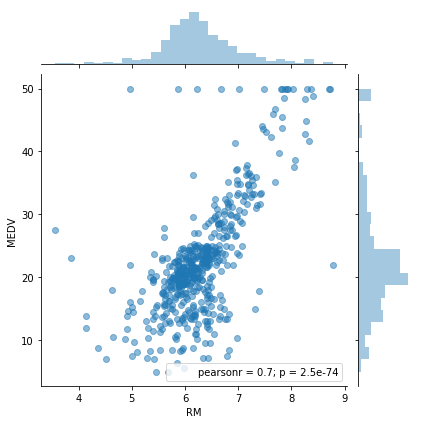

In [4]:
sns.jointplot(x = "RM", y = "MEDV", data = data, kind='scatter', joint_kws={'alpha':0.5});

In [5]:
#ааЗаБаАаВаЛбаЕаМбб аОб аВбаБбаОбаОаВ
data = data[(data['RM'] != 8.78) & (data['MEDV'] != 50.0) & (data['RM'] >= 4)]

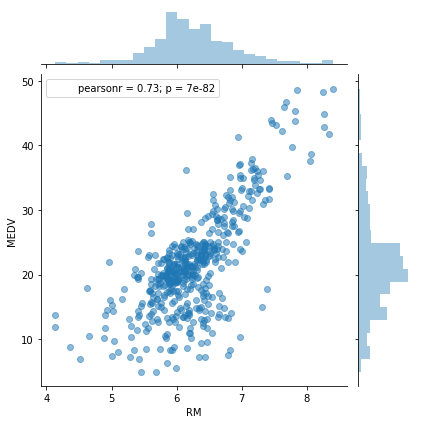

In [6]:
sns.jointplot(x = 'RM', y = 'MEDV', data = data, kind='scatter', joint_kws={'alpha':0.5});

In [50]:
#баОаЗаДаАбаМ ббаЕаНаИбаОаВаОбаНбб аИ аПбаОаВаЕбаОбаНбб аВбаБаОбаКаИ
m = data['RM'].count()
tr = int(round(0.67 * m))
te = m - tr
data_train = data.sort_values(by = 'RM').tail(tr)
data_test = data.sort_values(by = 'RM').head(te)

In [51]:
X = data['RM']
X_train = data_train['RM']
Y_train = data_train['MEDV']
X_test = data_test['RM']
Y_test = data_test['MEDV']

In [52]:
class GDRegressor:
    
    def __init__(self, alpha=0.01, max_iter=100):
        self.alpha = alpha
        self.max_iter = max_iter
        pass
    
    def fit(self, X_train, Y_train):
        # ааАбаОаЖаДаЕаНаИаЕ аПаОаДбаОаДббаИб аЗаНаАбаЕаНаИаЙ аПаАбаАаМаЕббаОаВ
        n = X_train.count()
        theta0 = random.random()
        theta1 = random.random()
        
        for i in range(self.max_iter):
            XY_pred_diff = X_train.apply(lambda z: theta0 + theta1 * z) - Y_train
            XY_pred_diff_X_mult = XY_pred_diff * X_train
            theta0 -= self.alpha * XY_pred_diff.sum() / n
            theta1 -= self.alpha * XY_pred_diff_X_mult.sum() / n
        
        self.coef_ = theta1
        self.intercept_ = theta0
        return self.coef_, self.intercept_
    
    def cf_fit(self, X_train, Y_train, X_test, Y_test):
        # ааАбаОаЖаДаЕаНаИаЕ аОбаИаБаКаИ аПаОбаЛаЕ аКаАаЖаДаОаЙ аИбаЕбаАбаИаИ аПбаОбаЕббаА аНаАбаОаЖаДаЕаНаИб аПаОаДбаОаДббаИб аЗаНаАбаЕаНаИаЙ аПаАбаАаМаЕббаОаВ
        n = X_train.count()
        self.intercept_ = random.random()
        self.coef_ = random.random()
        Errs = []
        Iters = []
        for i in range(self.max_iter):
            Y_pred = self.predict(X_test)
            err = rmse(Y_pred, Y_test)
            Errs.append(err)
            Iters.append(i)
            XY_pred_diff = X_train.apply(lambda z: self.intercept_ + self.coef_ * z) - Y_train
            XY_pred_diff_X_mult = XY_pred_diff * X_train
            self.intercept_ -= self.alpha * XY_pred_diff.sum() / n
            self.coef_ -= self.alpha * XY_pred_diff_X_mult.sum() / n
        return Errs, Iters
    
    def predict(self, X_test):
        Y_pred = self.coef_ * X_test + self.intercept_
        return Y_pred


In [53]:
f = GDRegressor(0.04, 2000)
f.fit(X_train, Y_train)

(6.5263550589236337, -18.650535052007513)

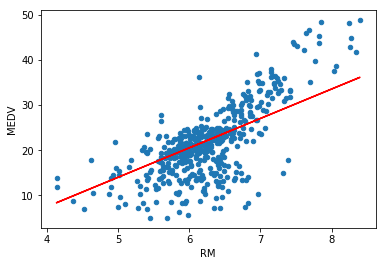

In [54]:
data.plot(kind = 'scatter', x = 'RM', y = 'MEDV');

plt.plot(X, f.coef_ * X + f.intercept_, 'r');

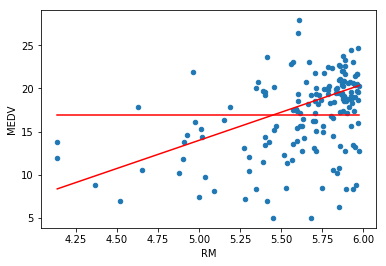

In [55]:
data_test.plot(kind = 'scatter', x = 'RM', y = 'MEDV');

plt.plot(X_test, f.coef_ * X_test + f.intercept_, 'r');

plt.plot(X_test, Y_test.apply(lambda z: Y_test.mean()), 'r');

In [56]:
def rmse(Y_pred, Y_test):
    Y_diff = Y_pred - Y_test
    y_meansquarerr = math.sqrt(Y_diff.apply(lambda z: z ** 2).sum() / Y_diff.count())
    return y_meansquarerr

def r_squared(Y_pred, Y_test):
    y_mcr = Y_test.mean()
    Y_num = (Y_test - Y_pred).apply(lambda z: z ** 2)
    Y_denom = Y_test.apply(lambda z: (z - y_mcr) ** 2)
    err = 1 - Y_num.sum() / Y_denom.sum()
    return err

In [57]:
Y_pred = f.predict(X_test)
rmse(Y_pred, Y_test)

4.459397057808287

In [58]:
r_squared(Y_pred, Y_test)

0.09498265823198249

абаАбаИаК аИббаИаНаНбб аЗаНаАбаЕаНаИаЙ аИ аПбаОаГаНаОаЗаОаВ:

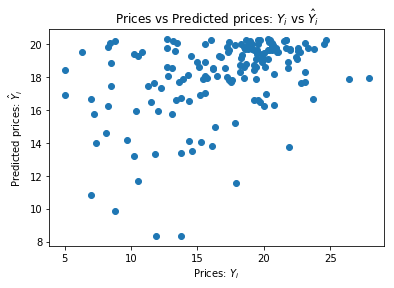

In [59]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$");

абаАбаИаК аОббаАбаКаОаВ:

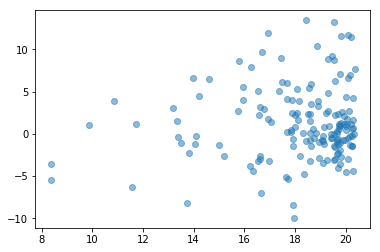

In [60]:
plt.scatter(Y_pred, (Y_pred-Y_test), alpha=0.5);

In [63]:
def plot_cost_function(X_train, Y_train, max_iters = 2000, alpha = 0.04):
    f = GDRegressor(alpha, max_iters)
    E_values, Iters = f.cf_fit(X_train, Y_train, X_train, Y_train)
    E_values = pd.Series(data = E_values)
    Iters = pd.Series(data = Iters)
    plt.plot(Iters, E_values.apply(lambda z: z ** 2), 'b');
    pass

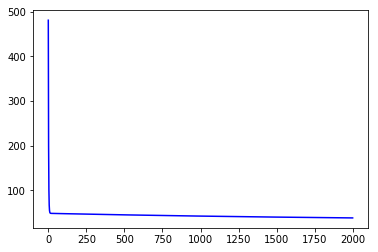

In [65]:
plot_cost_function(X_train, Y_train, max_iters = 2000, alpha = 0.04)